In [14]:
### Installing the required packages if not already installed
packages = ['numpy', 'pandas', 'warnings', 'sqlite3', 'scipy', 'matplotlib', 'numba']

for package in packages:
    try:
        __import__(package)
    except ImportError:
        %pip install {package}

import numpy as np    # For numerical computing
import pandas as pd   # For data manipulation
import sqlite3        # For connecting to SQL database
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats
from scipy.stats import skew, kurtosis
from numba import njit
import os

### Setting the random seed for reproducibility
np.random.seed(42)

### Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

### Pandas display options
pd.options.display.float_format = '{:.4f}'.format

### Getting some fuctions from the other notebook
%run 99_functions.ipynb

### Setting working directory
os.chdir('/Users/emilwilliamhansen/Desktop/Master-Thesis/Code')

In [15]:
### Extracting the data from the database
conn = sqlite3.connect('Data/data.db')

factor_ret_m = pd.read_sql('SELECT * FROM factors_monthly', conn).set_index('Date').drop(columns='rf')
volatility = pd.read_sql('SELECT * FROM volatility', conn).set_index('Date')
volatility_timed_factors = pd.read_sql('SELECT * FROM volatility_timed_factors', conn).set_index('Date')
volatility_timed_factors_mkt = pd.read_sql('SELECT * FROM volatility_timed_factors_mkt', conn).set_index('Date')
volatility_managed_ptf = pd.read_sql('SELECT * FROM volatility_managed_factor_ptf_outofsample', conn).set_index('Date')
MV = pd.read_sql('SELECT * FROM MV', conn).set_index('Date')

conn.close()

### Making sure all the data is in the same format
factor_ret_m.index = pd.to_datetime(factor_ret_m.index)
volatility.index = pd.to_datetime(volatility.index)
volatility_managed_ptf.index = pd.to_datetime(volatility_managed_ptf.index)
volatility_timed_factors.index = pd.to_datetime(volatility_timed_factors.index)
volatility_timed_factors_mkt.index = pd.to_datetime(volatility_timed_factors_mkt.index)
MV.index = pd.to_datetime(MV.index)

### Making all of them start from 1993-02
factor_ret_m = factor_ret_m.loc['1993-02':]
volatility = volatility.loc['1993-02':]
volatility_timed_factors = volatility_timed_factors.loc['1993-02':]
volatility_timed_factors_mkt = volatility_timed_factors_mkt.loc['1993-02':]
volatility_managed_ptf = volatility_managed_ptf.loc['1993-02':]
MV = MV.loc['1993-02':]

# Histograms

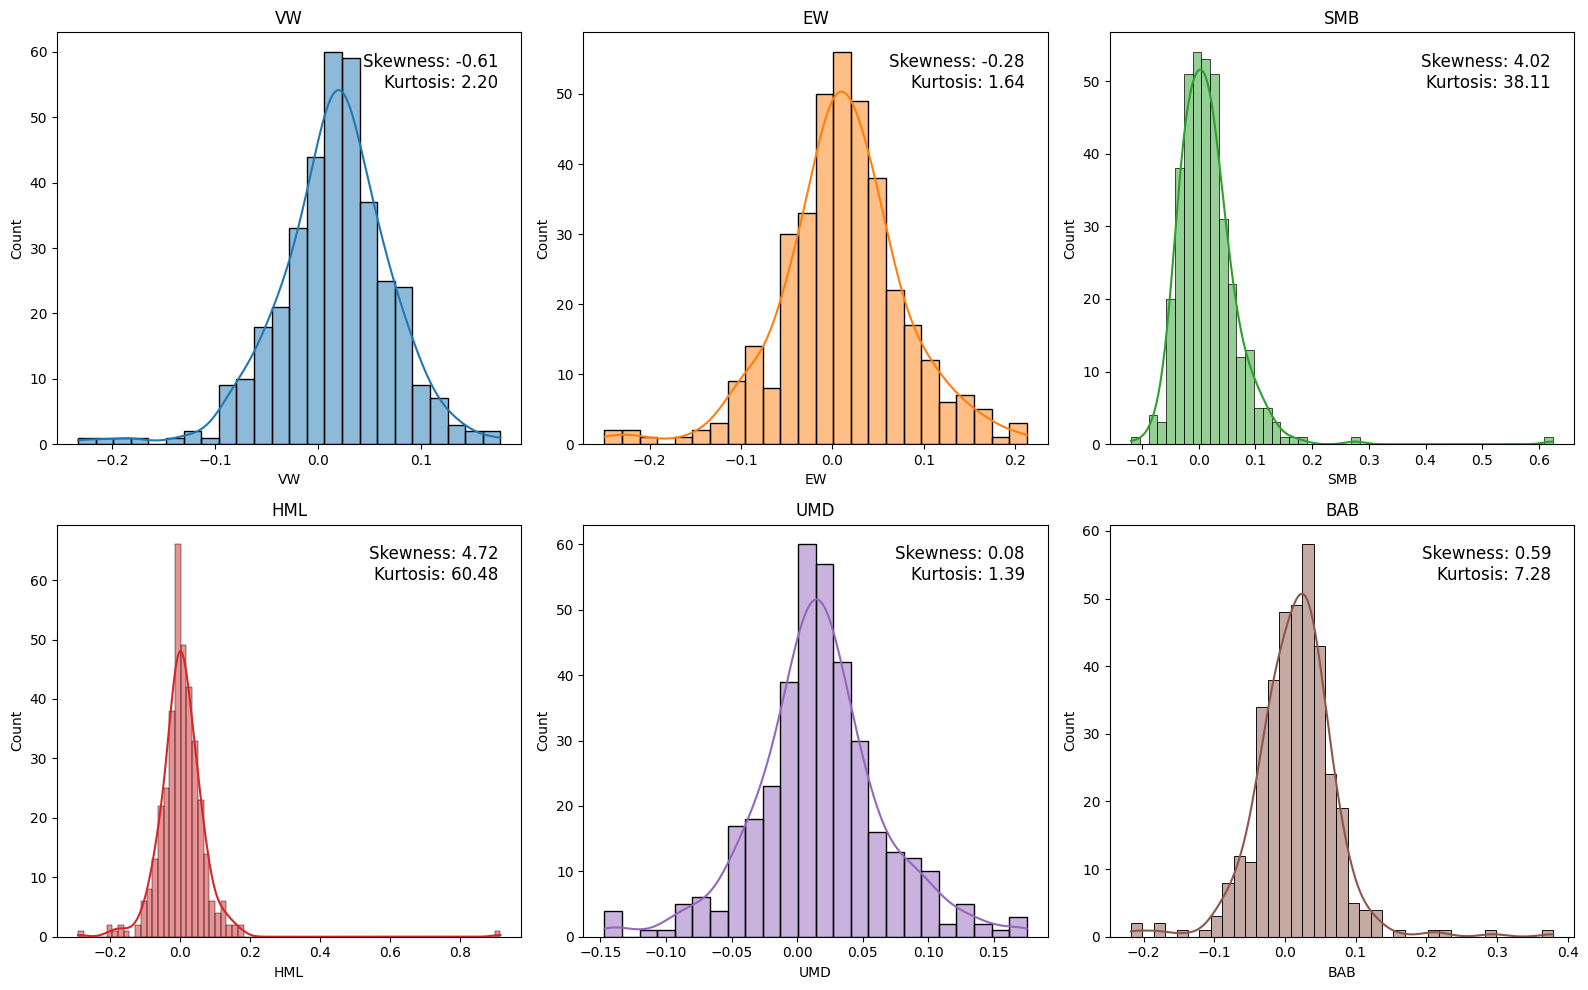

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(factor_ret_m[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(factor_ret_m[factor].dropna())
    kurt = kurtosis(factor_ret_m[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_orginal_factors.png')
plt.show()

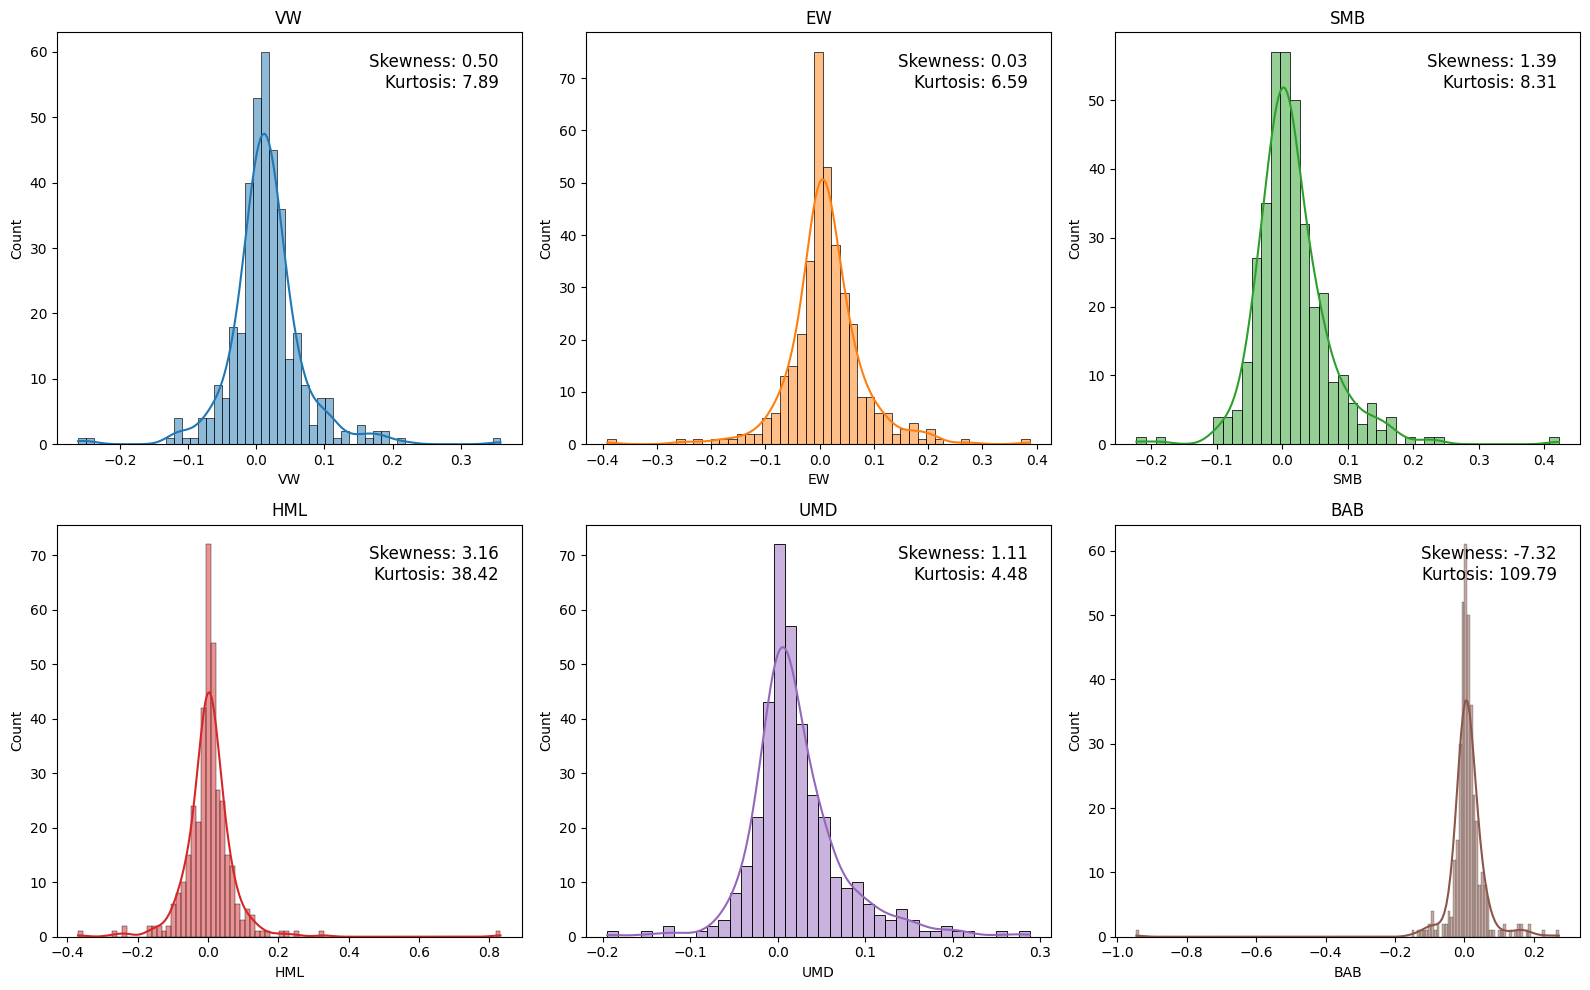

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(volatility_timed_factors[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(volatility_timed_factors[factor].dropna())
    kurt = kurtosis(volatility_timed_factors[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_voltimed_factors.png')
plt.show()

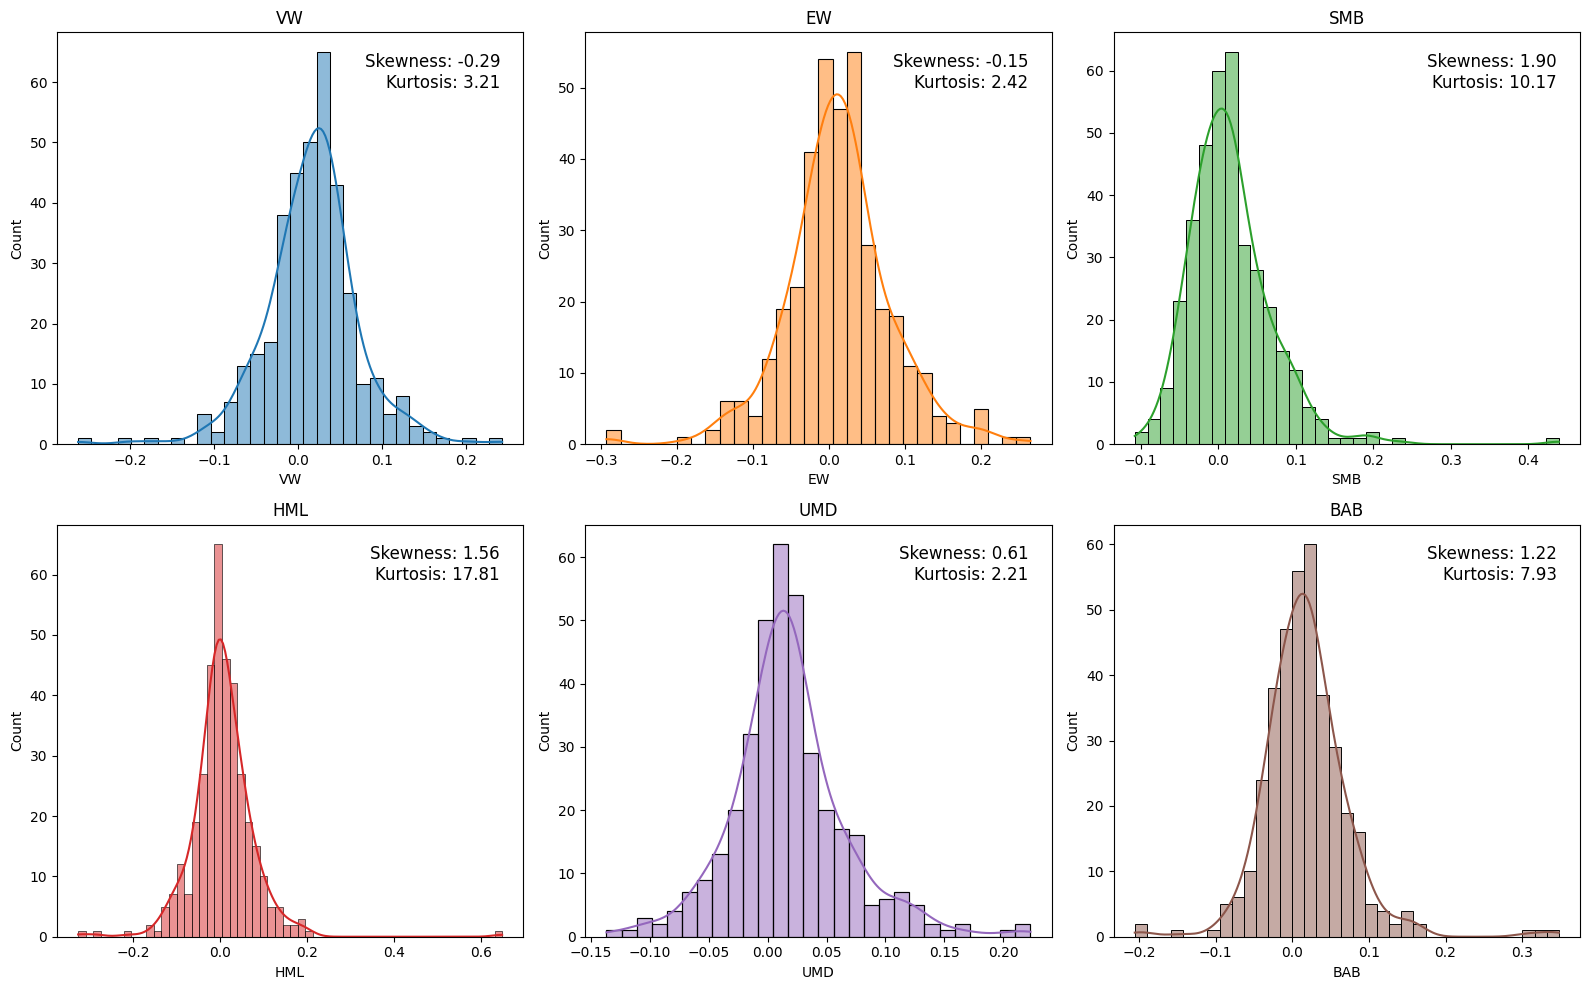

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(volatility_timed_factors_mkt[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(volatility_timed_factors_mkt[factor].dropna())
    kurt = kurtosis(volatility_timed_factors_mkt[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_voltimed_factors_mkt.png')
plt.show()

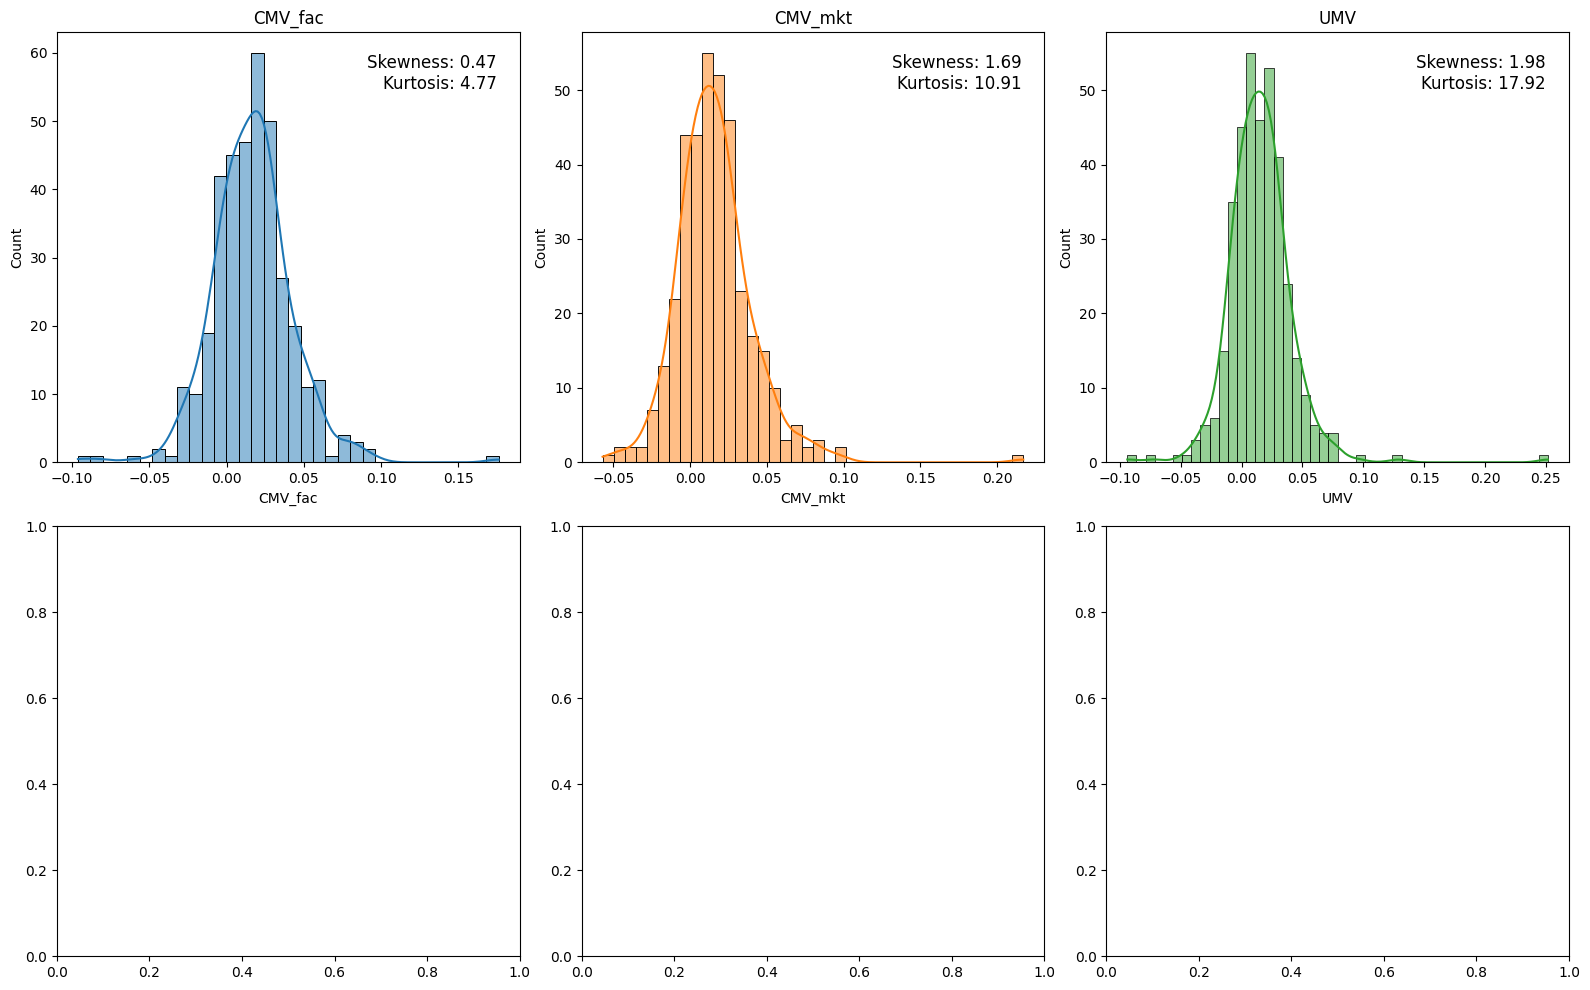

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting histograms and adding skewness and kurtosis
factors = ["CMV_fac", "CMV_mkt", "UMV"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    sns.histplot(MV[factor], kde=True, ax=ax, color=color)
    ax.set_title(factor)
    skewness = skew(MV[factor].dropna())
    kurt = kurtosis(MV[factor].dropna())
    ax.text(0.95, 0.95, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig('Plots/histograms_voltimed_factors_mkt.png')
plt.show()

# Drawdowns

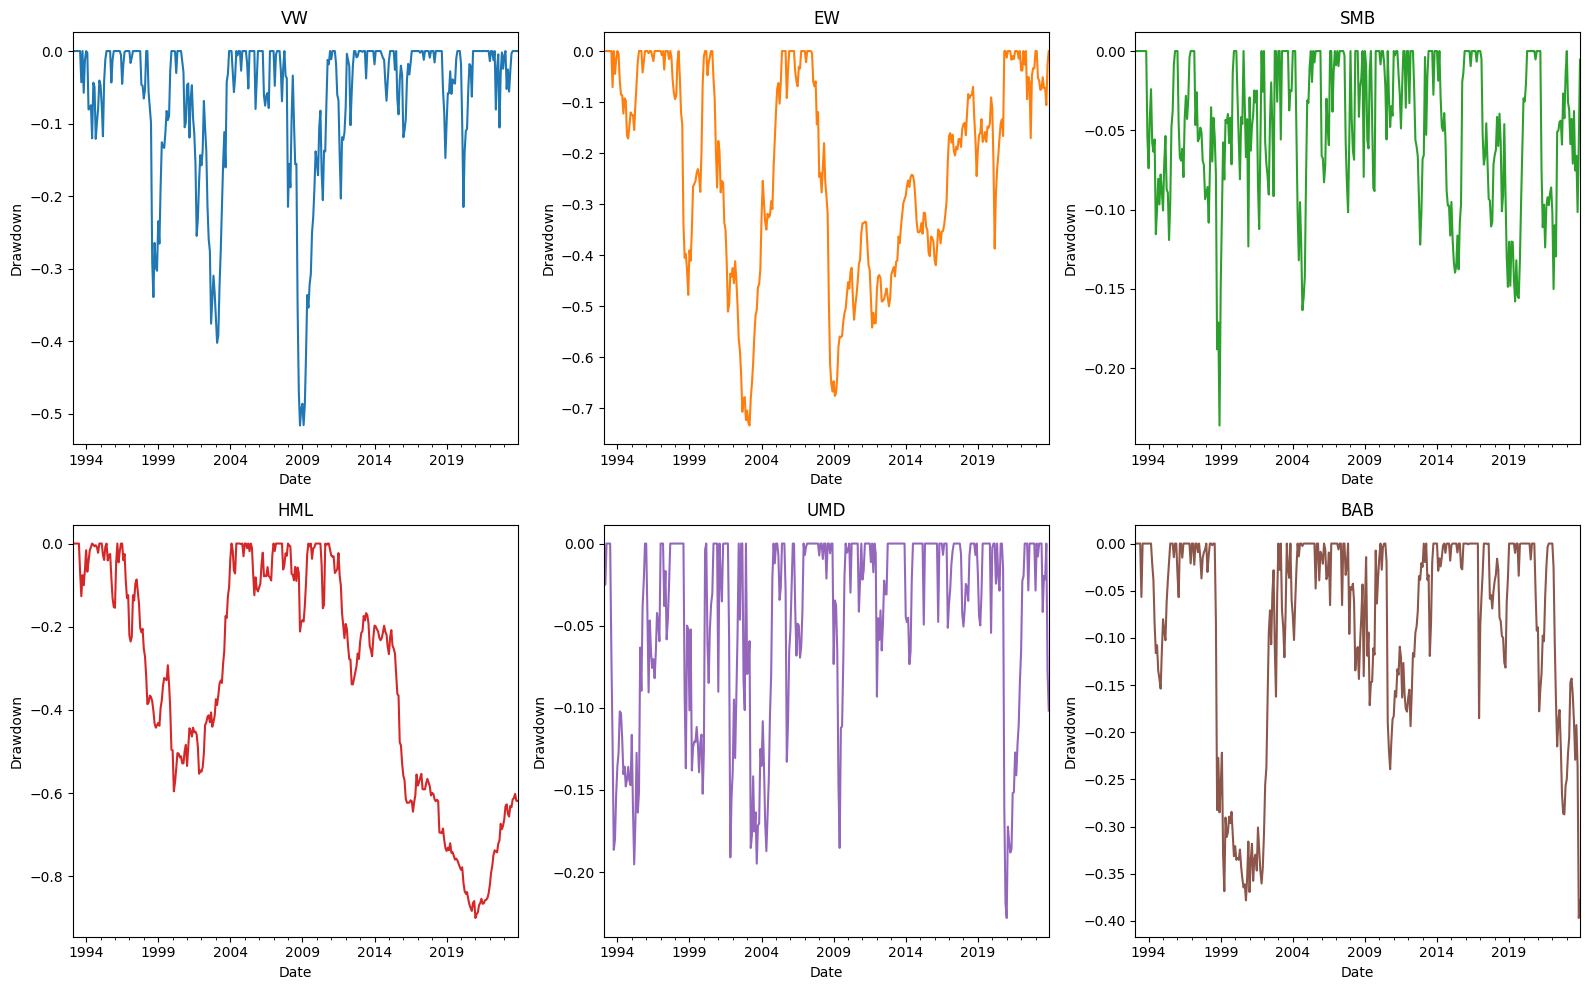

In [20]:
### Function to calculate and plot drawdowns
def plot_drawdowns(returns, ax=None, color='blue'):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak

    if ax is None:
        ax = plt.gca()
    drawdown.plot(ax=ax, color=color)
    ax.set_ylabel('Drawdown')
    ax.set_xlabel('Date')

### Plotting drawdowns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting drawdowns
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    plot_drawdowns(factor_ret_m[factor], ax=ax, color=color)
    ax.set_title(factor)

plt.tight_layout()
plt.savefig('Plots/drawdowns_orginal_factors.png')
plt.show()

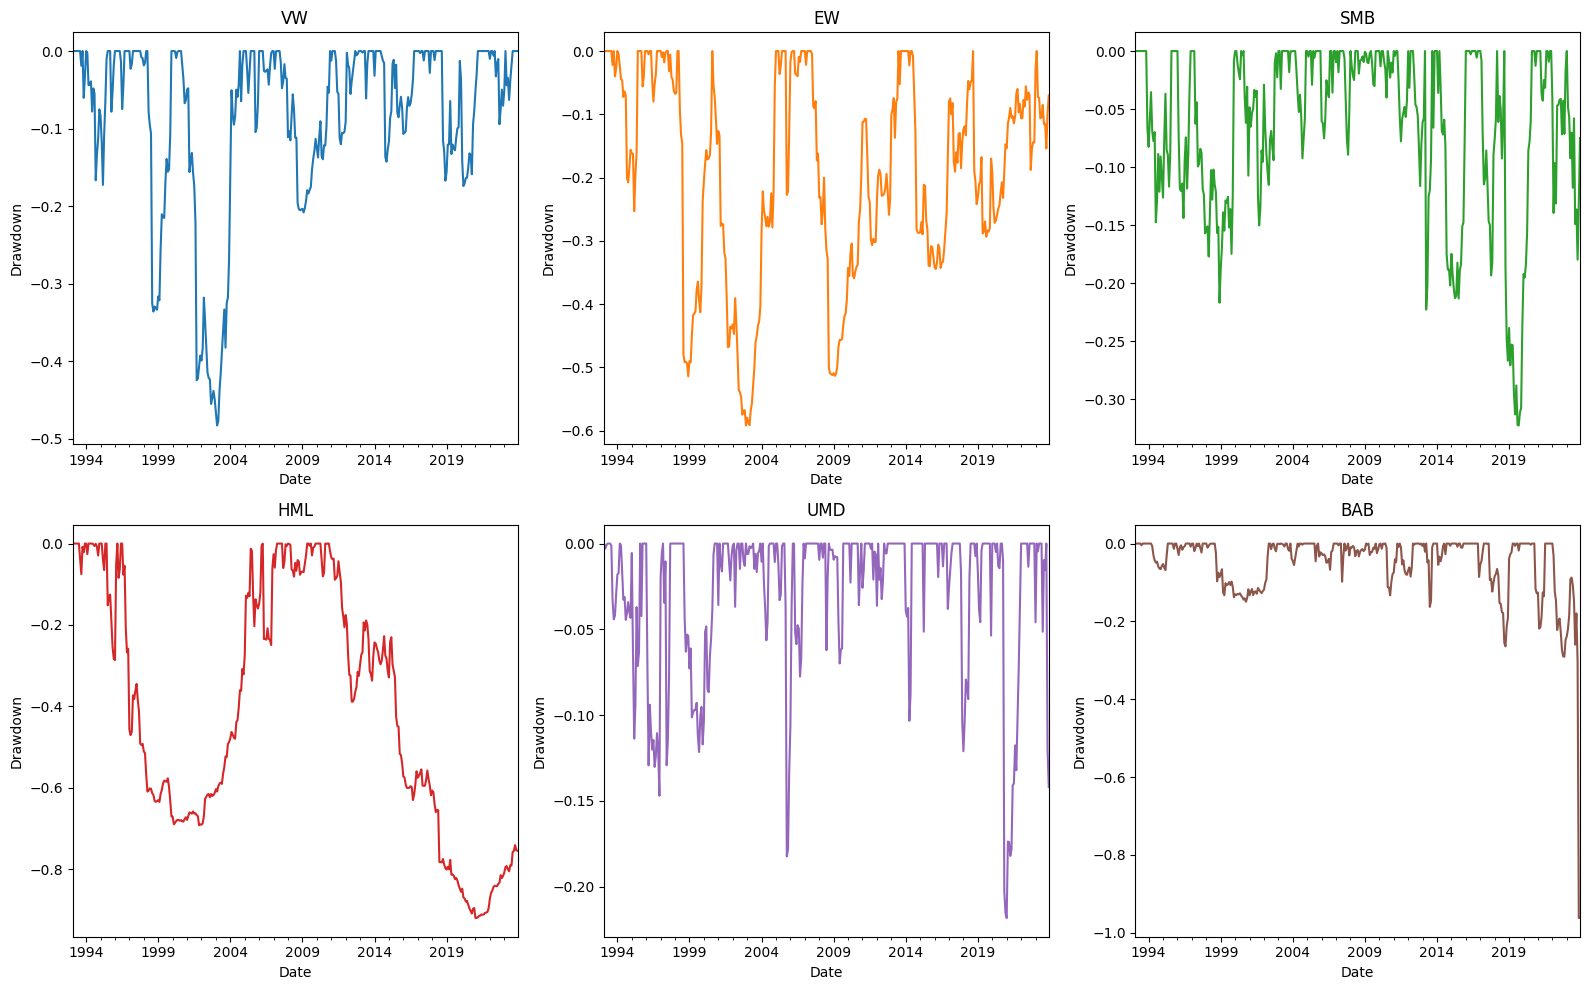

In [21]:
### Plotting drawdowns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting drawdowns
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    plot_drawdowns(volatility_timed_factors[factor], ax=ax, color=color)
    ax.set_title(factor)

plt.tight_layout()
plt.savefig('Plots/drawdowns_voltimed_factors.png')
plt.show()

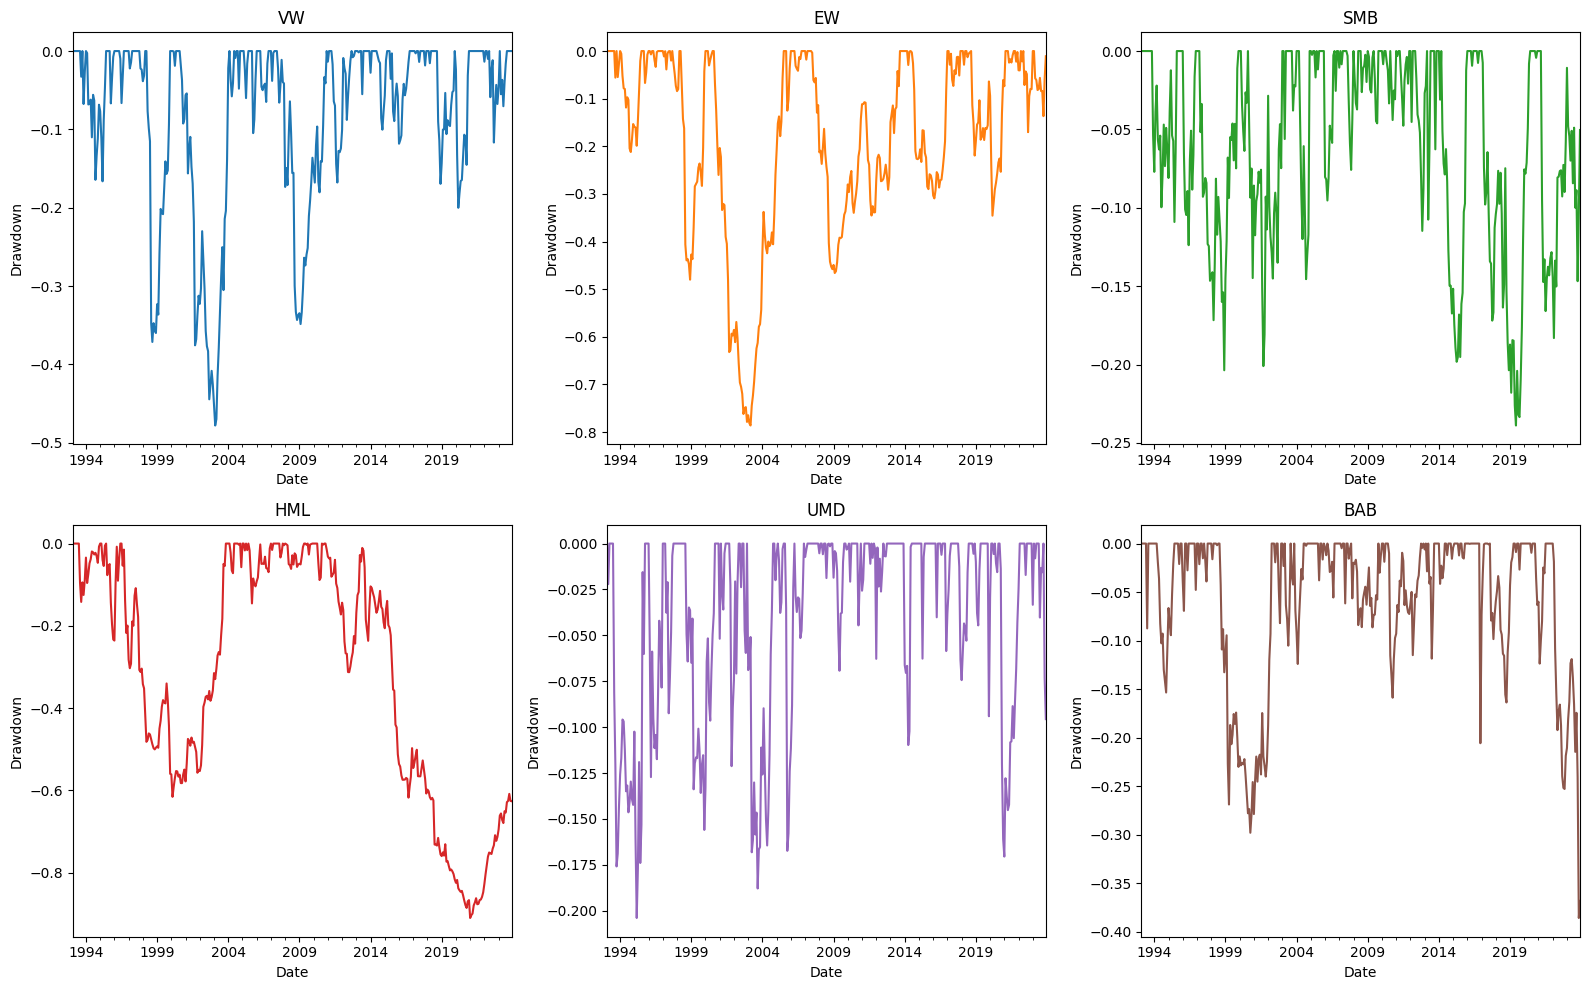

In [22]:
### Plotting drawdowns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting drawdowns
factors = ["VW", "EW", "SMB", "HML", "UMD", "BAB"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    plot_drawdowns(volatility_timed_factors_mkt[factor], ax=ax, color=color)
    ax.set_title(factor)

plt.tight_layout()
plt.savefig('Plots/drawdowns_voltimed_factors_mkt.png')
plt.show()

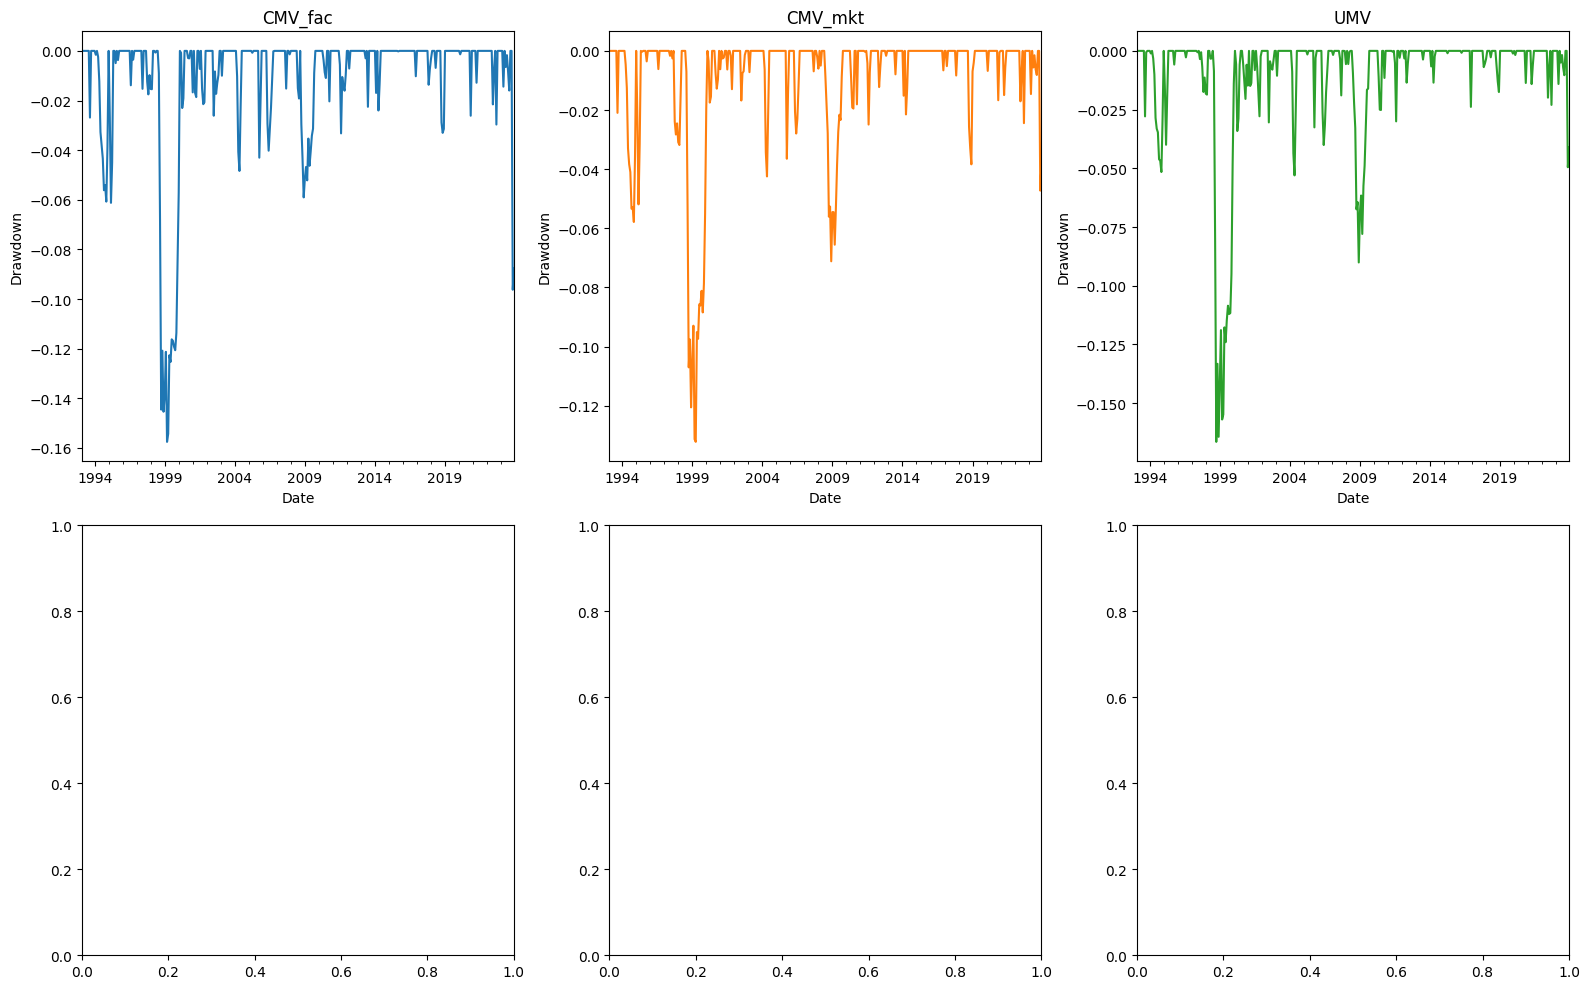

In [23]:
### Plotting drawdowns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plotting drawdowns
factors = ["CMV_fac", "CMV_mkt", "UMV"]
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (factor, color) in enumerate(zip(factors, colors)):
    ax = axes[i // 3, i % 3]
    plot_drawdowns(MV[factor], ax=ax, color=color)
    ax.set_title(factor)

plt.tight_layout()
plt.savefig('Plots/drawdowns_MV.png')
plt.show()